<a href="https://colab.research.google.com/github/javed163/Deep-Learning/blob/main/Creating_Artifical_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Churn_Modelling.csv")

In [3]:
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [5]:
data.shape

(10000, 14)

In [6]:
x = data.iloc[:,3:13]
y = data.iloc[:,13]

In [9]:
# creating dummies varible
geography = pd.get_dummies(x['Geography'], drop_first = True)
gender = pd.get_dummies(x['Gender'], drop_first = True)

In [16]:
# concatenate the dataframe
x = pd.concat([x, geography,gender], axis = 1)

In [17]:
# drop the unnecessary column
x = x.drop(['Geography','Gender'], axis = 1)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [22]:
# importing keras library and packages
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.layers import LeakyReLU, ELU, PReLU

In [42]:
# initialize  ANN
classifier = Sequential()
# adding the input layer and first hidden layer
classifier.add(Dense(input_dim = 14, activation = 'relu', units = 10, kernel_initializer = 'he_uniform'))
classifier.add(Dropout(0.3))
# adding second hidden layer
classifier.add(Dense(activation = 'relu', units = 10, kernel_initializer = 'he_uniform'))
classifier.add(Dropout(0.4))
# adding output layer
classifier.add(Dense(activation = 'sigmoid', units = 1, kernel_initializer = 'glorot_uniform'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# compiling the ANN
classifier.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [44]:
# fitting the ANN to the  train model
model_history = classifier.fit(x_train, y_train, validation_split = 0.3, batch_size = 10, epochs = 20)

Epoch 1/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6741 - loss: 0.6933 - val_accuracy: 0.7962 - val_loss: 0.4846
Epoch 2/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7906 - loss: 0.5330 - val_accuracy: 0.7958 - val_loss: 0.4734
Epoch 3/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7840 - loss: 0.5141 - val_accuracy: 0.7958 - val_loss: 0.4646
Epoch 4/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7939 - loss: 0.4862 - val_accuracy: 0.7958 - val_loss: 0.4589
Epoch 5/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7923 - loss: 0.4843 - val_accuracy: 0.7958 - val_loss: 0.4542
Epoch 6/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8053 - loss: 0.4658 - val_accuracy: 0.7958 - val_loss: 0.4487
Epoch 7/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8035 - loss: 0.4594 - val_accuracy: 0.7958 - val_loss: 0.4426
Epoch 8/20
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8032 - loss: 0.4527 - val_accuracy: 0.

In [45]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


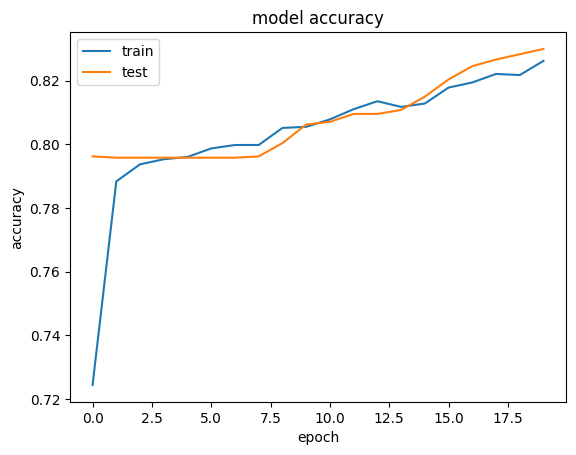

In [46]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [47]:
# predicting the test set result
y_pred = classifier.predict(x_train)
y_pred = (y_pred > 0.5)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred)

In [49]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred))

0.837875
